In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [2]:
import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.cm as cm

#from sklearn.cluster import MiniBatchKMeans
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#Upload CSV to session storage
books_sample = pd.read_csv('/content/books_data (1).csv')

In [5]:
books_sample

,Unnamed: 0,Author,Text
0,0,a,the next second he had raised the surprised Fi...
1,1,a,"“You’re too young to be a brigadier-general, a..."
2,2,a,"Kapay. He was scarcely older than Phil, and ye..."
3,3,a,we had in the dago country and up with them pi...
4,4,a,now being idly collected. Into these spacious ...
...,...,...,...
995,995,e,"Illustrated. 12mo. Cloth, $1.50.CHRISTINE'S CA..."
996,996,e,"to pour in, at first in tens and then in hundr..."
997,997,e,"singular one.""Until the shocks of the volcanoe..."
998,998,e,islands only appeared in the months of steady ...


In [6]:
x = books_sample["Text"] 

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk import pos_tag


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
#Remove blank rows if any.
books_sample["Text"].dropna(inplace=True)
#Change all the text to lower case.
books_sample["Text"] = [entry.lower() for entry in books_sample["Text"]]
#Tokenization
books_sample["Text"]= [word_tokenize(entry) for entry in books_sample["Text"]]
#Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(books_sample["Text"]):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words('english') and word.isalpha():
      word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
      Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
  books_sample.loc[index,'text_final'] = str(Final_words)

In [ ]:
# lemmatiser = WordNetLemmatizer()
# #Add a condition to check for digits
# def text_process(tex):
#     # 1. Removal of Punctuation Marks 
#     nopunct=[char for char in tex if char not in string.punctuation]
#     nopunct=''.join(nopunct)
#     # 2. Lemmatisation 
#     a=''
#     i=0
#     for i in range(len(nopunct.split())):
#         b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
#         a=a+b+' '
#     # 3. Removal of Stopwords
#     return [word for word in a.split() if word.lower() not 
#             in stopwords.words('english')]

In [11]:
books_sample

,Unnamed: 0,Author,Text,text_final
0,0,a,"[the, next, second, he, had, raised, the, surp...","['next', 'second', 'raise', 'surprised', 'fili..."
1,1,a,"[“, you, ’, re, too, young, to, be, a, brigadi...","['young', 'although', 'get', 'star', 'phil', '..."
2,2,a,"[kapay, ., he, was, scarcely, older, than, phi...","['kapay', 'scarcely', 'old', 'phil', 'yet', 'h..."
3,3,a,"[we, had, in, the, dago, country, and, up, wit...","['dago', 'country', 'pigtailed', 'midshipman',..."
4,4,a,"[now, being, idly, collected, ., into, these, ...","['idly', 'collect', 'spacious', 'storehouses',..."
...,...,...,...,...
995,995,e,"[illustrated, ., 12mo, ., cloth, ,, $, 1.50.ch...","['illustrate', 'cloth', 'career', 'story', 'gi..."
996,996,e,"[to, pour, in, ,, at, first, in, tens, and, th...","['pour', 'first', 'ten', 'hundred', 'sound', '..."
997,997,e,"[singular, one, ., ``, until, the, shocks, of,...","['singular', 'one', 'shock', 'volcano', 'shall..."
998,998,e,"[islands, only, appeared, in, the, months, of,...","['island', 'appear', 'month', 'steady', 'sail'..."


In [12]:
from sklearn.preprocessing import LabelEncoder
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [13]:
books_sample['encoded_author']=y

In [14]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
)
tfidf.fit(books_sample['text_final'])
text = tfidf.transform(books_sample['text_final'])

In [15]:
text

<1000x2534 sparse matrix of type '<class 'numpy.float64'>'
	with 51528 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.02


In [20]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# n_components = np.arange(1, 21)
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_svd) for n in n_components]
# plt.plot(n_components, [m.bic(text.toarray()) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(text.toarray()) for m in models], label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components');

In [ ]:
# gmm = GaussianMixture(n_components=5)
# gmm.fit(X_svd)

# labels = gmm.predict(X_svd)
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis');

# gmm.predict_proba(X_svd)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# authors = labelencoder.fit_transform(books_sample['Author'])a

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score

for i in [2, 3, 4, 5,6,7,8]:
    gmm = GaussianMixture(n_components=i)
    #gmm.fit(X_svd)
    labels=gmm.fit_predict(X_svd,y)
    score = silhouette_score(X_svd, labels, metric='euclidean')
    print("silhouette coefficient for ",i," clusters s:", score,"k: ",cohen_kappa_score(y, labels))

silhouette coefficient for  2  clusters s: 0.7269441074985081 k:  -0.2350000000000001
silhouette coefficient for  3  clusters s: 0.33948235872623117 k:  0.06374999999999997
silhouette coefficient for  4  clusters s: 0.38680290470005596 k:  -0.0887500000000001
silhouette coefficient for  5  clusters s: 0.3634179827250403 k:  0.03374999999999995
silhouette coefficient for  6  clusters s: 0.3659691587949941 k:  -0.04933726067746713
silhouette coefficient for  7  clusters s: 0.35506634497469 k:  0.23439340400471131
silhouette coefficient for  8  clusters s: 0.34508737876786333 k:  -0.06728802000454648


Total variance explained: 0.02


array([[7.08455254e-02, 1.54594053e-11, 1.65559976e-02, 2.50636717e-05,
        9.12573413e-01],
       [1.33602475e-03, 3.09312781e-09, 5.45209745e-02, 4.63356880e-07,
        9.44142534e-01],
       [1.21641612e-01, 5.55838850e-12, 1.24845773e-02, 5.71237443e-05,
        8.65816687e-01],
       ...,
       [8.28286584e-01, 1.97295182e-13, 3.48590985e-02, 3.50998432e-03,
        1.33344333e-01],
       [1.13134389e-01, 2.81811630e-11, 4.20842549e-02, 5.89221277e-05,
        8.44722434e-01],
       [4.70477009e-01, 4.31055173e-11, 5.13364311e-01, 1.32193710e-02,
        2.93930892e-03]])

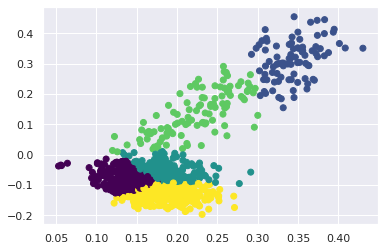

In [22]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# n_components = np.arange(1, 21)
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_svd) for n in n_components]
# plt.plot(n_components, [m.bic(text.toarray()) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(text.toarray()) for m in models], label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components');
gmm = GaussianMixture(n_components=5)
#gmm.fit(X_svd)

#labels = gmm.predict(X_svd) 
labels=gmm.fit_predict(X_svd, y)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis');

gmm.predict_proba(X_svd)


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_svd, labels, metric='euclidean')
print(score)

0.3709834556273885


In [24]:
len(X_svd[0])

2

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y, labels)

0.06125000000000003

In [ ]:
books_sample['cluster'] = labels
books_sample['encoded_author']=y

In [ ]:
c=0
for i in range(0,999):
  if(books_sample['cluster'][i]!=books_sample['encoded_author'][i]):
    c+=1
print(c)

750


In [ ]:
from sklearn.metrics import confusion_matrix
x=confusion_matrix(books_sample['encoded_author'],books_sample['cluster'])

In [ ]:
x

array([[ 14,   0,  16, 170,   0],
       [  8,  85,   0,   0, 107],
       [123,   0,  70,   7,   0],
       [  9,   0, 114,  77,   0],
       [ 56,   0,  78,  63,   3]])